<font size = '6'><b>Dynamic Systems with Python</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 50% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
            Prof. Seungchul Lee<br>iSystems (http://isystems.unist.ac.kr/)<br>UNIST
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>

# 1. Natural response to non-zero initial conditions

## 1.1. The First Order ODE
- MIT 2.087 Engineering Mathematics: Linear Algebra and ODEs, Fall 2014, by Gilbert Strang

<br>
$$ \frac{dx(t)}{dt} = kx(t), \qquad x(0)=x_0$$

$$ \rightarrow \; x(t) = x_0e^{\,kt}$$

In [1]:
%%html
<iframe src="https://www.youtube.com/embed/4X0SGGrXDiI?start=399&end=459" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from control import *
from scipy import *
from scipy import linalg as la
from scipy.ndimage.filters import convolve

%matplotlib inline

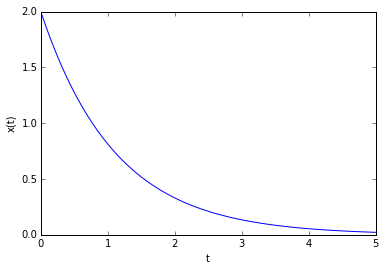

In [3]:
# plot an analytic solution

k = -0.9
x0 = 2

t = linspace(0,5,100)
x = x0*exp(k*t)

plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')

plt.show()

# but, all we did is just plotting (not computing)

To use `lsim` command, transform it to the state space representation


$$\dot{x} = Ax + Bu\\ y = Cx + Du$$

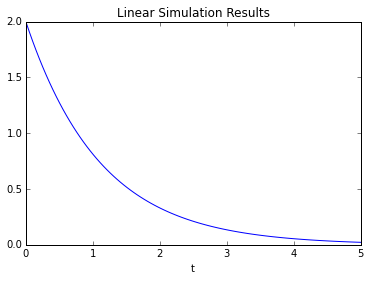

In [4]:
# numerically solve an ODE using lsim

A = k
B = 0
C = 1
D = 0

G = ss(A,B,C,D)

x0 = 2

t = linspace(0,5,100)
u = np.zeros(t.shape)

[y,tout,x] = lsim(G,u,t,x0)

plt.plot(tout,y)
plt.title('Linear Simulation Results')
plt.xlabel('t')

plt.show()

## 1.2. The Second Order ODE
- MIT 2.087 Engineering Mathematics: Linear Algebra and ODEs, Fall 2014, by Gilbert Strang

In [5]:
%%html
<iframe src="https://www.youtube.com/embed/xvTYUnqn2wY" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

Generic form 

$$ a\frac{d^2x(t)}{dt^2} + b\frac{dx(t)}{dt} + cx(t) = 0, \qquad \dot{x}(0)=v_0, x(0)=x_0$$

One of examples is the mass-spring-damper system

<p style="text-align:center">
	<img src="http://shared.crawlab.org/MassSpringDamper_FreeVibration.png" alt="A Mass-Spring-Damper System" width=40%/></a><br>
    <strong> Figure 1: A Mass-Spring-Damper System </strong>
</p>

This notebook simluates the free vibration of a simple mass-spring-damper system like the one shown in Figure 1. More specifically, we'll look at how system response to non-zero initial conditions. 

The equation of motion for the system is:

$$ \quad m \ddot{x} + c \dot{x} + kx = 0 $$

We could also write this equation in terms of the damping ratio, $\zeta$, and natural frequency $\omega_n$.

$$ \quad \ddot{x} + 2\zeta\omega_n\dot{x} + \omega_n^2x = 0$$

We'll use the solution to the differential equation that we developed in class to plot the response. The solution for the underdamped case is:

$$ \quad x(t) = e^{-\zeta\omega_nt}\left(a_1 e^{i \omega_d t} + a_2 e ^{-i \omega_d t}\right) $$

*or*

$$ \quad x(t) = e^{-\zeta\omega_nt}\left(b_1 \cos{\omega_d t} + b_2 \sin{\omega_d t}\right) $$

To use this equation, we need to solve for $a_1$ and $a_2$ or $b_1$ and $b_2$ using the initial conditions. Here, let's use the sin/cosine form. Solving the equation for generic intial velocity, $\dot{x} = v_0$, and a generic initial displacement, $x = x_0$, we find:

$$ \quad x(t) = e^{-\zeta\omega_nt}\left(x_0 \cos{\omega_d t} + \frac{\zeta \omega_n x_0 + v_0}{\omega_d} \sin{\omega_d t}\right) $$

** Experiment **

In [6]:
%%html
<iframe src="https://www.youtube.com/embed/ZqedDWEAUN4?start=80&end=114" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

## 1.3. State Space Representation

<br>
$$
\begin{align*}
\left[ {\begin{matrix}
   \dot{x}_1 \\
   \dot{x}_2 \\   
  \end{matrix} } \right]
  &=
\left[ {\begin{matrix}
   0 & 1 \\
   -\omega_n^2 & -2\zeta \omega_n \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] \\y & = 
\left[ {\begin{matrix}
   1 & 0    
\end{matrix} } \right]  
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right]  
\end{align*}
$$

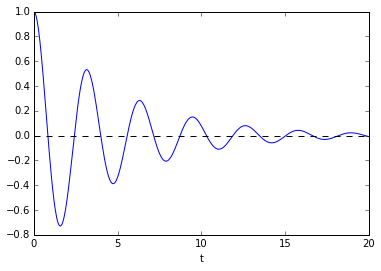

In [7]:
# method 1: use 'lsim'

wn = 2
zeta = 0.1

A = np.array([[0,1],[-wn**2,-2*zeta*wn]])
B = [[0],[0]]
C = [1,0]
D = 0

G = ss(A,B,C,D)

x0 = np.array([[1],[0]])

t = linspace(0,20,500)
u = np.zeros(t.shape)

[y,tout,non] = lsim(G,u,t,x0)

plt.plot(tout,y)
plt.plot(tout,np.zeros(t.shape),'k--')
plt.xlabel('t')

plt.show()

## 1.4. Matrix Exponentials

<br>
$$ 
y(t) = e^{At}x\left( 0 \right) $$
<br>

- Lec 23 | MIT 18.06 Linear Algebra, Spring 2005 
- Matrix Exponentials | MIT 18.03SC Differential Equations, Fall 2011 
- Differential Equations and exp (At) | MIT 18.06SC Linear Algebra, Fall 2011 


In [8]:
%%html
<iframe src="https://www.youtube.com/embed/IZqwi0wJovM" 
width="420" height="315" frameborder="0" allowfullscreen></iframe>

In [9]:
%%html
<iframe src="https://www.youtube.com/embed/qbyeQum8qTE" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

In [10]:
%%html
<iframe src="https://www.youtube.com/embed/dZfdKXxhnTM" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

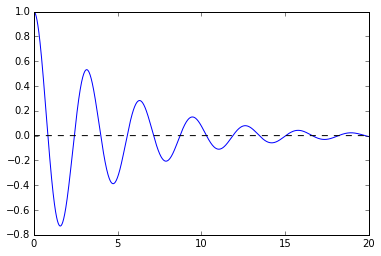

In [11]:
# method 2: use expm (matrix exponential)
x0 = np.array([[1],[0]])
x = np.array([[],[]])

t = np.arange(0.0,20.0,0.01)

for i in range(0,t.shape[0]):
    add = la.expm(t[i]*A)
    add_= np.dot(add,x0)
    x   = np.hstack((x,add_))
    
plt.plot(t,x[0])
plt.plot(t,np.zeros(t.shape),'k--')

plt.show()

## 1.5. Systems of Differential Equations (Matrix Differential Equation)
- Matrix Methods | MIT 18.03SC Differential Equations, Fall 2011 

In [12]:
%%html
<iframe src="https://www.youtube.com/embed/YUjdyKhWt6E" 
width="560" height="315" frameborder="0" allowfullscreen></iframe>

Given


$$ \dot{\vec{u}} = A\vec{u}, \qquad \vec{u}(0) = \vec{u}_0$$

- Eigenanalysis

$$ A\vec{x}_1 = \lambda_1 \vec{x}_1$$
$$ A\vec{x}_2 = \lambda_2 \vec{x}_2$$

- General solution: $$ \vec{u}(t) = c_1 \, e^{\lambda_1 t} \, \vec{x}_1 + c_2 \, e^{\lambda_2 t} \, \vec{x}_2 $$

where $$
\left[ {\begin{matrix}
   c_1 \\
   c_2 \\   
  \end{matrix} } \right] = 
\left[ {\begin{array}{cc}
   \vec{x}_1 \, \, \vec{x}_2 \\
  \end{array} } \right]^{-1}
\left[ {\begin{array}{cc}
   u_1(0) \\
   u_2(0) \\   
\end{array} } \right].
$$

<br>
- Systems of differential equations $\leftrightarrow$ Eigenanalysis (Gilbert Strang Lecture 21, video below)

- System stability $\leftrightarrow$ eigenvalues

In [13]:
%%html
<iframe src="https://www.youtube.com/embed/lXNXrLcoerU" 
width="420" height="315" frameborder="0" allowfullscreen></iframe>

### 1.5.1. Real eigenvalues

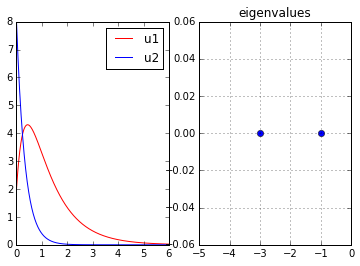

In [14]:
A = np.array([[-1,2],[0,-3]])

## eigen-analysis 
################################################################
V = la.eig(A)[1]
lamb = la.eig(A)[0]
D = diag(lamb)

t = np.arange(0.0,6.0,0.01)    
U0 = np.array([[2,8]]).T
C = dot(la.inv(V),U0)

u = C[0][0]*dot(V[:,[0]],exp(lamb[0]*np.array([t]))) + \
    C[1][0]*dot(V[:,[1]],exp(lamb[1]*np.array([t])))
################################################################

# plot u1 and u2 as a function of time
plt.subplot(1,2,1)
plt.plot(t,real(u[0,:]),'r')
plt.plot(t,real(u[1,:]),'b')
plt.axis('tight')
plt.legend(['u1','u2'])

plt.subplot(1,2,2)
plt.plot(real(lamb),imag(lamb),'o')
plt.xlim([-5,0])
plt.grid(True)
plt.title('eigenvalues')

plt.show()

__Phase portrait__
- https://en.wikipedia.org/wiki/Phase_portrait
- http://tutorial.math.lamar.edu/Classes/DE/PhasePlane.aspx
- Lec 27 | MIT 18.03 Differential Equations, Spring 2006 

In [15]:
%%html
<iframe src="https://www.youtube.com/embed/e3FfmXtkppM" 
width="420" height="315" frameborder="0" allowfullscreen></iframe>

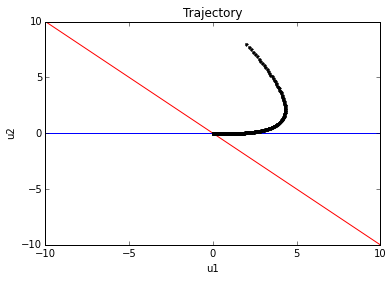

In [16]:
# plot eigenvectors (X1 and X2)

k = np.arange(-20.0,20.0,0.1)
y1 = np.dot(V[:,[0]],[k])
y2 = np.dot(V[:,[1]],[k])

plt.plot(real(y1[0,:]),real(y1[1,:]),'b')
plt.plot(real(y2[0,:]),real(y2[1,:]),'r')
plt.xlabel('u1')
plt.ylabel('u2')
plt.title('Trajectory')
plt.xlim(-10,10)
plt.ylim(-10,10)

# plot a trajectory of u1 and u2 
for i in range(0, t.shape[0]):
    plt.plot(real(u[0,i]),real(u[1,i]),'k.')

plt.show()

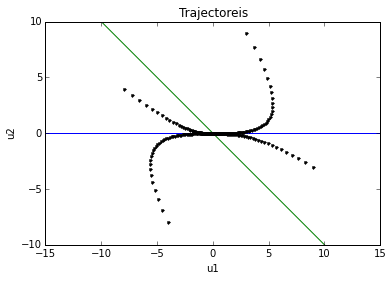

In [17]:
# with multiple initial conditions

A = np.array([[-1,2],[0,-3]])
#A = np.array([[-2,0],[0,-4]])
#A = np.array([[-2,0],[1,-4]]) 

##
V = la.eig(A)[1]
lamb = la.eig(A)[0]
D = diag(lamb)

t = np.arange(0.0,5.0,0.05) 
U0 = np.array([[3, 9,-8, -4],
               [9,-3, 4, -8]])

# plot eigenvectors (X1 and X2)
k = np.arange(-20.0,20.0,0.1)
y1 = dot(V[:,[0]],[k])
y2 = dot(V[:,[1]],[k])

plt.plot(y1[0,:],y1[1,:])
plt.plot(y2[0,:],y2[1,:])

for m in range(0, U0.shape[1]):
    C = dot(la.inv(V),U0[:,[m]])
    u = C[0][0]*dot(V[:,[0]],exp(lamb[0]*np.array([t]))) + \
        C[1][0]*dot(V[:,[1]],exp(lamb[1]*np.array([t])))

    # plot a trajectory of u1 and u2 
    for i in range(0, len(t)):
        plt.plot(real(u[0,i]),real(u[1,i]),'k.') 

plt.xlabel('u1')
plt.ylabel('u2')
plt.title('Trajectoreis')
plt.axis('equal')
plt.axis([-10,10,-10,10])

plt.show()

### 1.5.2. Complex eigenvalues (starting oscilation)

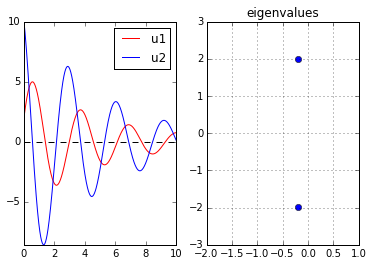

In [18]:
#A = np.array([[0,1],[-1,0]])    
wn = 2
zeta = 0.1
A = np.array([[0,1],[-wn**2.0,-2*zeta*wn]])

##################################################################
V = la.eig(A)[1]
lamb = la.eig(A)[0]
D = diag(lamb)

t = np.arange(0.0,10.0,0.01)
U0 = np.array([[2,10]]).T
C = dot(la.inv(V),U0)

u = C[0][0]*dot(V[:,[0]],exp(lamb[0]*np.array([t]))) + \
    C[1][0]*dot(V[:,[1]],exp(lamb[1]*np.array([t])))

##################################################################

# plot u1 and u2 as a function of time
plt.subplot(1,2,1)
plt.plot(t,real(u[0,:]),'r')
plt.plot(t,real(u[1,:]),'b')
plt.plot(t,np.zeros(t.shape),'k--')
plt.axis('tight')
plt.legend(['u1','u2'])

plt.subplot(1,2,2)
plt.plot(real(lamb),imag(lamb),'o')
plt.xlim(-2,1)
plt.ylim(-3,3)
plt.grid(True)
plt.title('eigenvalues')

plt.show()

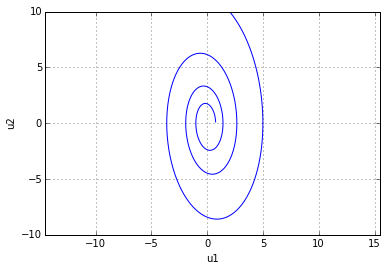

In [19]:
# Phase portrait
plt.plot(real(u[0,:]),real(u[1,:]),'b')
plt.axis('equal')
plt.grid(True)
plt.xlabel('u1')
plt.ylabel('u2')

plt.show()

# 2. Response to General Inputs

## 2.1. Step response
Start with a _**step response**_ example

$$ \dot{x} + 5x = 1 \quad \text{for} \quad t \geq 0, \qquad x(0) = 0$$

or

$$ \dot{x} + 5x = u(t), \qquad x(0) = 0 $$

The solution is given:

$$ x(t) = \frac{1}{5}\left( 1-e^{-5t} \right)$$

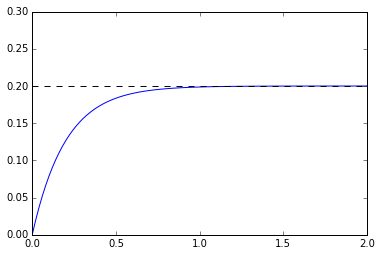

In [20]:
t = linspace(0,2,100)
x = 1./5*(1 - exp(-5*t))

plt.plot(t,x)
plt.plot(t,0.2*np.ones(t.shape),'k--')
plt.ylim(0,0.3)

plt.show()

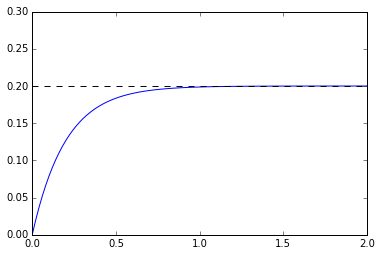

In [21]:
# method 1
# define a system first

num = 1
den = [1,5]

G = tf(num,den)

[y,tout] = step(G,t)

plt.plot(tout,y)
plt.plot(tout,0.2*np.ones(tout.shape),'k--')
plt.ylim([0,0.3])

plt.show()

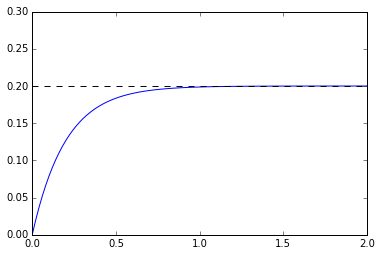

In [22]:
# method 2
# define a system first
A = -5
B = 1
C = 1
D = 0

G = ss(A,B,C,D)

t = linspace(0,2,100)
u = np.ones(t.shape)
x0 = 0

[y,tout,non] = lsim(G,u,t,x0)

plt.plot(tout,y)
plt.plot(tout,0.2*ones(tout.shape),'k--')
plt.ylim([0, 0.3])

plt.show()

## 2.2. Impulse response

Now think about the _**impulse response**_

$$ \dot{x} + 5x = \delta(t), \qquad x(0) = 0 $$

The solution is given: (why?)

$$ h(t) = e^{-5t},\quad t\geq0$$ 

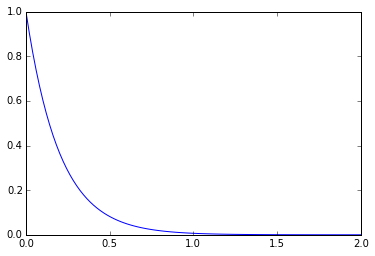

In [23]:
t = linspace(0,2,100)
h = exp(-5*t)

plt.plot(t,h)
plt.ylim([0,1])

plt.show()

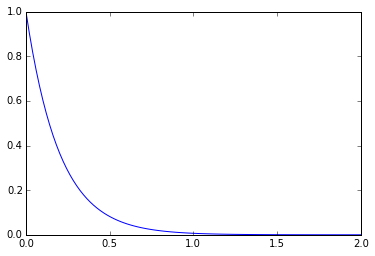

In [24]:
# method 1
# define a system first
num = 1
den = [1,5]

G = tf(num,den)

[h,tout] = impulse(G,t)

plt.plot(tout,h)
plt.ylim([0,1])

plt.show()

Impulse input can be equivalently changed to zero input with non-zero initial condition (by the impulse and momentum theory)


$$ \int_{0^-}^{0^+}\delta(t) dt = u(0^+)-u(0^-)=1$$

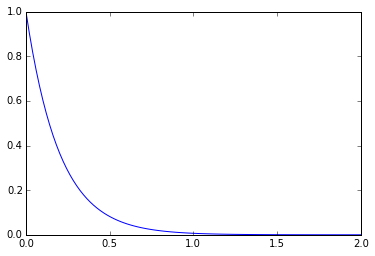

In [25]:
# method 2
# define a system first
A = -5
B = 1
C = 1
D = 0

G = ss(A,B,C,D)

t = linspace(0,2,100)

#########################################
u = np.zeros(t.shape)
x0 = 1
#########################################

[h,tout,non] = lsim(G,u,t,x0)

plt.plot(tout,h)
plt.ylim([0,1])

plt.show()

## 2.3. Response to a general input

Response to a _**general input**_

$$ \dot{x} + 5x = f(t), \qquad x(0) = 0 $$

The solution is given:

$$ x(t) = h(t)*f(t),\quad t\geq0$$

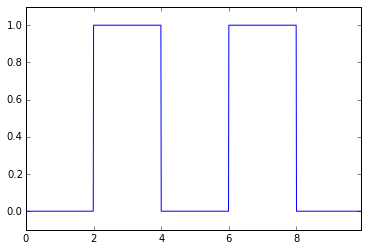

In [26]:
# generate a general input

t = np.arange(0,10,0.01)
f = np.zeros(200)
for i in range(0, 2):
    f = np.hstack((f, np.ones(200)))
    f = np.hstack((f, np.zeros(200)))

plt.plot(t,f)
plt.axis([0,9.9,-0.1,1.1])

plt.show()

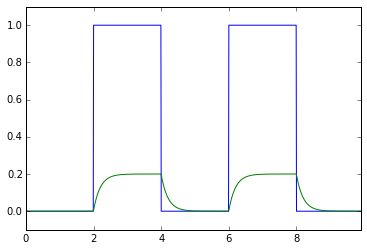

In [27]:
# use lsim

A = -5
B = 1
C = 1
D = 0

G = ss(A,B,C,D)

x0 = 0
[y, tout, non] = lsim(G,f,t,x0)

plt.plot(t,f)
plt.plot(tout, y)
plt.axis([0,9.9,-0.1,1.1])

plt.show()

In [28]:
# cconv function does not exist in python

## 2.4. Reponse to a sinusoidal input

- only focus on _steady-state_ solution
- transient solution is not our interest any more

Assume:

$$ y(t)=\sin(\omega t)$$

Then, the solution $x(t)$ should have the form:

$$ x(t)=a\sin(\omega t)+b\cos(\omega t) = A \sin(\omega t + \phi)$$

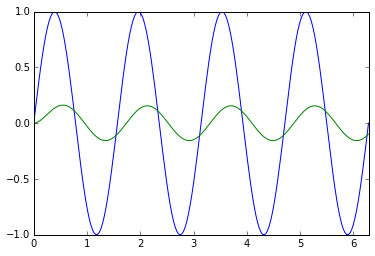

In [29]:
# use lsim

A = -5
B = 1
C = 1
D = 0

G = ss(A,B,C,D)

x0 = 0
w = 4

t = linspace(0,2*pi,200)
f = sin(w*t)

[y,tout,non] = lsim(G,f,t,x0)

plt.plot(t,f)
plt.plot(tout,y)
plt.axis('tight')
plt.show()

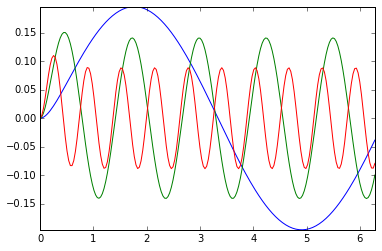

In [30]:
A = -5
B = 1
C = 1
D = 0

G = ss(A,B,C,D)

x0 = 0
t = linspace(0,2*pi,200)

W = [1,5,10]
for w in W:
    f = sin(w*t);
    [y,tout,non] = lsim(G,f,t,x0)
    plt.plot(tout,y)

plt.axis('tight')

plt.show()

# 3. Frequency response (frequency sweep)

Given input $ e^{j\omega t} $

$$ \dot{z} + 5z = e^{j\omega t} $$

If $ z = Ae^{j(\omega t + \phi)} $

$$ 
\begin{align*}
j\omega A e^{j(\omega t + \phi)} + 5Ae^{j(\omega t + \phi)} &= e^{j\omega t}\\
\left( j\omega + 5  \right)Ae^{j\phi} &= 1\\
\end{align*}
$$

Therefore,

$$
\begin{align*}
A &= \frac{1}{\mid {j\omega + 5}\mid} \\
\phi &= -\angle{(j\omega + 5)}
\end{align*}
$$


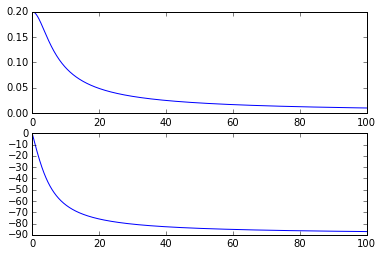

In [31]:
w = np.arange(0.1,100.0,0.1)
A = 1./abs(1j*w+5)
Ph = -angle(1j*w+5)*180/pi

plt.subplot(2,1,1)
plt.plot(w,A)

plt.subplot(2,1,2)
plt.plot(w,Ph)

plt.show()

# later, we will see that this is kind of a bode plot

<br>

$$\begin{align*} 
\quad \ddot{z} + 2\zeta\omega_n\dot{z} + \omega_n^2 z &= \omega_n^2 \;f(t)\\
\quad \ddot{z} + 2\zeta\omega_n\dot{z} + \omega_n^2 z &= \omega_n^2 \;A_0e^{j \Omega t}
\end{align*}$$

- We know that $z$ is in the form of 

$$z = A e^{j(\Omega t + \phi)}$$

- Then


$$ 
\begin{align*}\left( -\Omega^2 + j 2\zeta \omega_n \Omega + \omega_n^2 \right)Ae^{j\phi} e^{j\Omega t} &= \omega_n^2 A_0 e^{j \Omega t} \\
Ae^{j\phi} &= \frac{ \omega_n^2 A_0}{-\Omega^2 + j 2\zeta \omega_n \Omega + \omega_n^2} = A_0\frac{1}{1-\left(\frac{\Omega}{\omega_n}\right)^2 + j 2\zeta \left(\frac{\Omega}{\omega_n}\right)}
\end{align*}$$

<br>
$$ 
\begin{align*}\frac{A}{A_0} &= \frac{1}{ \sqrt{ \left(1-\left(\frac{\Omega}{\omega_n}\right)^2 \right)^2 +  4\zeta^2 \left(\frac{\Omega}{\omega_n}\right)^2 }} = \frac{1}{ \sqrt{ \left(1-\gamma^2 \right)^2 +  4\zeta^2 \gamma^2 }}, \quad  \left(\gamma = \frac{\Omega}{\omega_n} \right)\\
\phi &= -\tan^{-1} \left( \frac{2\zeta \frac{\Omega}{\omega_n}}{1-\left(\frac{\Omega}{\omega_n}\right)^2} \right) =-\tan^{-1} \left( \frac{2\zeta \gamma}{1-\gamma^2} \right)
\end{align*}$$


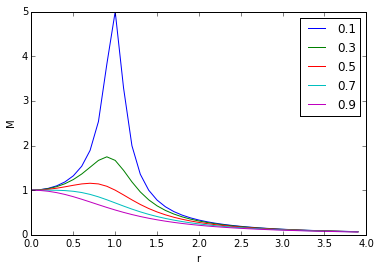

In [32]:
r = np.arange(0.0,4.0,0.1)

zeta = np.arange(0.1,1.0,0.2)

for i in range(0,zeta.shape[0]):
    M = 1./sqrt((1-r*r)**2 + (2*zeta[i]*r)**2) # ignore a constant of F0/k
    plt.plot(r, M)
    
plt.xlabel('r')
plt.ylabel('M')
plt.legend(['0.1','0.3','0.5','0.7','0.9'])

plt.show()

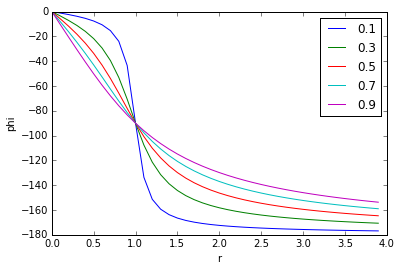

In [33]:
for i in range(0,zeta.shape[0]):
    phi = []
    for j in range(0,r.shape[0]):
        temp1 = 2*zeta[i]*r[j]
        temp2 = 1-r[j]** 2
        temp3 = math.atan2(temp1,temp2)
        phi.append(-temp3*180/pi)
    plt.plot(r, phi)

plt.xlabel('r')
plt.ylabel('phi')
plt.legend(['0.1', '0.3', '0.5', '0.7', '0.9'])

plt.show()

## 3.1. Fourier Series of square wave 
- decompose a genernal signal (ex. square wave) to a linear combinarion of sinusoidal signals


$$ x(t) = \frac{1}{2} - \frac{2}{\pi}\sum_{n =1,2,3,}\frac{1}{n}\sin\left( \frac{n\pi t}{L}\right) $$

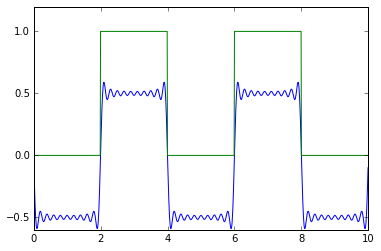

In [34]:
L = 2

t = np.arange(0.0,10.0,0.01)
f = np.zeros(200)
for i in range(0,2):
    f = np.hstack((f,np.ones(200)))
    f = np.hstack((f,np.zeros(200)))

x = 1/2*np.ones(t.shape)
for n in np.arange(1.0, 20.0, 2.0):
    x = x - 2/pi*1/n*sin(n*pi/L*t)

plt.plot(t,x)
plt.plot(t,f)

plt.show()

The output response of LTI

Linearity: input $ \sum_k c_k x_k(t)$ produces $ \sum_k c_k y_k(t)$

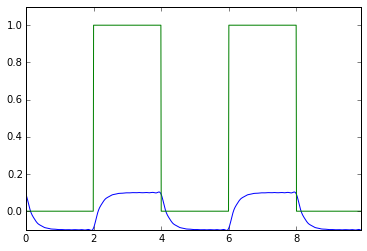

In [35]:
L = 2;

x = 1/2*np.ones(t.shape)
x2 = 0.2*x

for n in np.arange(1.0,20.0,2.0):
    w = n*pi/L
    A = 1./abs(1j*w+5)
    Ph = -angle(1j*w+5)
    x2 = x2 - 2/pi*1/n*A*sin(w*t + Ph)

plt.plot(t,x2)
plt.plot(t,f)
plt.axis([0,9.9,-0.1,1.1])

plt.show()

In [36]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>